# Read stack of dm3 image files

This notebook reads a stack of **.dm3** microscopy images for analysis.

In [112]:
import os
import numpy as np

# this is the library for reading the dm3 files
# install this using 'pip install ncempy'
from ncempy.io import dm

import matplotlib.pyplot as plt
# change matplotlib settings to make plots look nicer
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.minor.width'] = 3
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.minor.width'] = 3
plt.rcParams['ytick.major.width'] = 3

In [45]:
# identify the image stack filename
stack_filename = 'stack_pure_ZrO2-24%_25%_10_pics_each_26%_after_200us_1Hz.dm3'

# get full path of the image stack file
stack_path = os.path.join(os.getcwd(), stack_filename)

## Define some useful functions for later

In [98]:
def plot_setup(labels=['X', 'Y'], fsize=18, title=''):
    """Creates a custom plot configuration to make graphs look nice.
    This should be called between plt.plot() and plt.show() commands."""
    plt.xlabel(str(labels[0]), fontsize=fsize)
    plt.ylabel(str(labels[1]), fontsize=fsize)
    plt.title(title, fontsize=fsize)
    fig = plt.gcf()
    fig.set_size_inches(6, 6)

def read_stack(filepath):
    """Read dm3 stack file and get image information."""
    data = dm.dmReader(filepath)
    x_span = data['pixelSize'][1]*len(data['data'][1])
    y_span = data['pixelSize'][2]*len(data['data'][2])
    data['label'] = filepath.split('/')[-1].split('.dm3')[0]
    data['span'] = (0, x_span, 0, y_span)
    return data

def norm_image(img):
    """Normalize an image so its min and max stretch from 0 to 1."""
    img = img - img.min()
    img = img / img.max()
    return img

### Read the file

In [47]:
# read stack data
d = read_stack(stack_path)

# examine the data
for key in d:
    print('{}: {}'.format(key, d[key]))

filename: stack_pure_ZrO2-24%_25%_10_pics_each_26%_after_200us_1Hz.dm3
data: [[[1127 1197 1230 ... 1749 1662 1651]
  [ 996 1095 1164 ... 1703 1642 1661]
  [1134 1127 1158 ... 1741 1708 1618]
  ...
  [1565 1786 1770 ... 1676 1726 1721]
  [1688 1869 1777 ... 1764 1722 1838]
  [1707 1824 1660 ... 1717 1684 1750]]

 [[1136 1067 1289 ... 1691 1762 1698]
  [1096 1118 1231 ... 1725 1463 1549]
  [1193 1234 1206 ... 1656 1557 1513]
  ...
  [1491 1498 1473 ... 1570 1616 1491]
  [1534 1564 1524 ... 1711 1560 1491]
  [1711 1654 1567 ... 1658 1547 1483]]

 [[1570 1553 1651 ... 1602 1679 1633]
  [1815 1645 1679 ... 1653 1737 1750]
  [1781 1682 1705 ... 1722 1694 1741]
  ...
  [1796 1693 1608 ... 1449 1411 1465]
  [1792 1680 1564 ... 1604 1426 1316]
  [1604 1591 1493 ... 1616 1546 1515]]

 ...

 [[1377 1533 1604 ... 1407 1474 1680]
  [1309 1381 1454 ... 1410 1435 1597]
  [1273 1295 1311 ... 1567 1580 1556]
  ...
  [1425 1528 1531 ... 1689 1647 1635]
  [1512 1721 1587 ... 1538 1660 1677]
  [1642 1721 

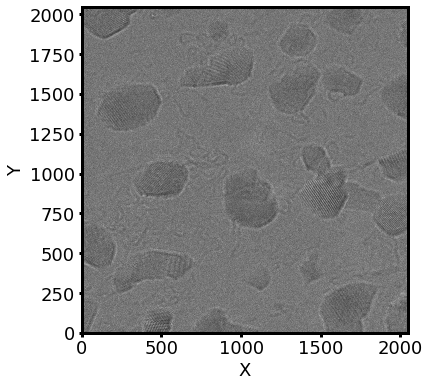

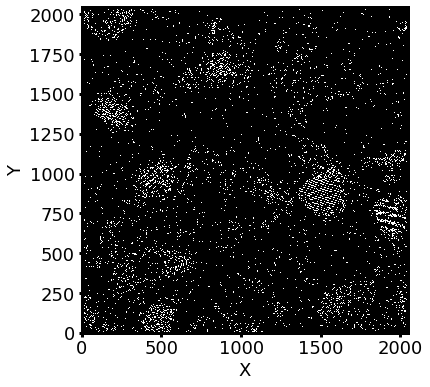

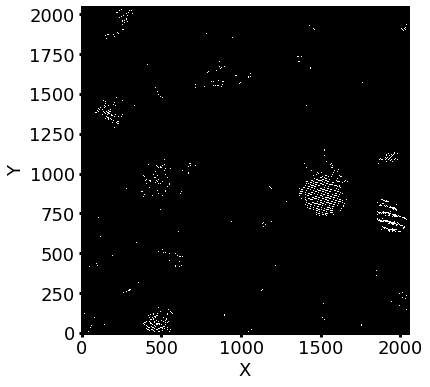

In [106]:
for i in range(1, d['data'].shape[0]):

    if i % 35 == 0:
        
        img = d['data'][i-1, :, :]
        img = norm_image(img)
        
        plt.imshow(img, extent=d['span'], origin='lower', cmap='gray')
        plot_setup()
        plt.show()
        
        # Compute the Canny filter for two values of sigma
        edges1 = feature.canny(img, sigma=1)
        edges2 = feature.canny(img, sigma=1.5)

        plt.imshow(edges1, extent=d['span'], origin='lower', cmap='gray')
        plot_setup()
        plt.show()
        
        plt.imshow(edges2, extent=d['span'], origin='lower', cmap='gray')  
        plot_setup()
        plt.show()
        
        
        

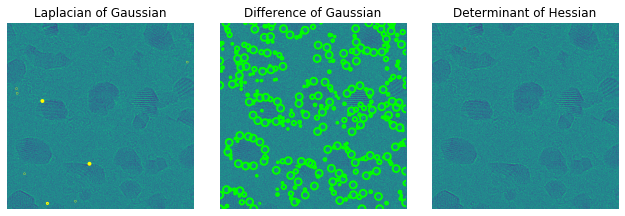

In [114]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt



blobs_log = blob_log(img, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(img, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(img, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(img)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

[]

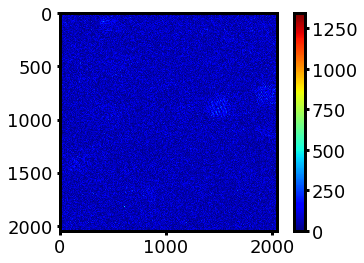

In [81]:
'''
grad_mag = np.sqrt(np.square(grad_x) + np.square(grad_y))

plt.imshow(grad_mag, cmap='jet')#, vmin=grad_mag.min(), vmax=grad_mag.max())
plt.colorbar()
plt.plot()
'''

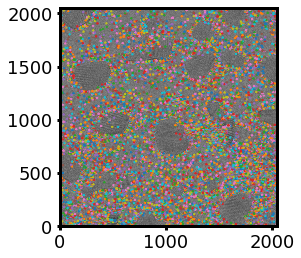

In [121]:
'''
from skimage import measure


# Find contours at a constant value of 0.8
contours = measure.find_contours(img, 0.55)

# Display the image and plot all contours found
plt.imshow(img, cmap=plt.cm.gray, origin='lower', extent=d['span'])

for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)

plt.show()
'''